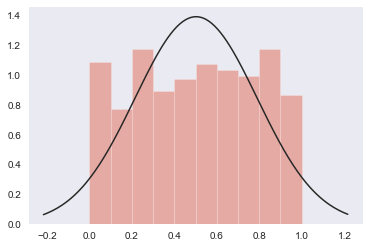

In [132]:
# random data with a normal distribution curve thrown on top
from scipy.stats import norm
x = np.random.rand(1000)
fig, ax = plt.subplots()
ax = sns.distplot(x, fit=norm, kde=False)

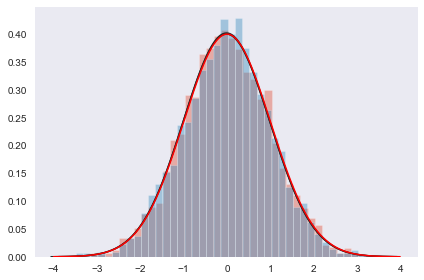

In [141]:
# normal distribution vs. standard normal distribution
# 3 flavors of code using numpy/scipy to get simulated normal distribution 
# scipy needed for the fit=norm in the seaborns distplot
from scipy.stats import norm

# flavor 1: normal distribution providing a mean and standard deviation
mu, sigma = 0, 1 # mean and standard deviation
x1 = np.random.normal(mu, sigma, 4000)

# flavor 2: standard normal distribution with mean = 0 and standard deviation = 1
x2 = np.random.randn(4000) 

# flavor 3: scipy way
x3_x = []
x3_y = []
for i in np.arange(-4,4,0.01):
    x3_x.append(i)
    x3_y.append(norm.pdf(i))
    

# output 3
fig, ax = plt.subplots()
ax = sns.distplot(x1, fit=norm, kde=False)
ax = sns.distplot(x2, fit=norm, kde=False)
ax = sns.lineplot(x=x3_x,y=x3_y, color='red',ls='--')
plt.tight_layout()
plt.savefig(fname='normal distribution.png', dpi=150)
plt.show()

In [158]:
# Normal Distribution Example
# https://towardsdatascience.com/understanding-the-normal-distribution-with-python-e70bb855b027
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Starting data in inches
# Assume that the true mean height of a person is 5 feet 6 inches 
# and the true standard deviation is 1 foot (12 inches) 
# Also define a variable called “target” of 6 feet, which is the height that our friend inquired about
mean_height = 5.5*12
stdev_height = 1*12
target = 6*12


In [159]:
# make a 10,000 by 10 array to hold our survey results, where each row is a survey of people heights
# Could have given the random variable function a mean and a standard deviation, 
# but manually customizing the mean and standard deviation of your random variable gives more intuition:
# A) You can shift the central location to where you want it
# B) You can shift the standard deviation of normally distributed random variable, by multiplying a constant
# np.random.normal generates a random number normally distributed with mean of 0 and a standard deviation of 1
# we customize the variable by multiplying volatility and then adding mean height to shift central location
random_variable = mean_height + np.random.normal()*stdev_height

# populate the array 
height_surveys = np.zeros((10000,10))
for i in range(height_surveys.shape[0]):
    for j in range(height_surveys.shape[1]):
        height_surveys[i,j] = mean_height + np.random.normal()*stdev_height

print('Mean Height: ', round(np.mean(height_surveys)/12,1), ' feet')
print('Standard Deviation of Height: ', round(np.var(height_surveys)**0.5 / 12, 1), ' feet')


Mean Height:  5.5  feet
Standard Deviation of Height:  1.0  feet


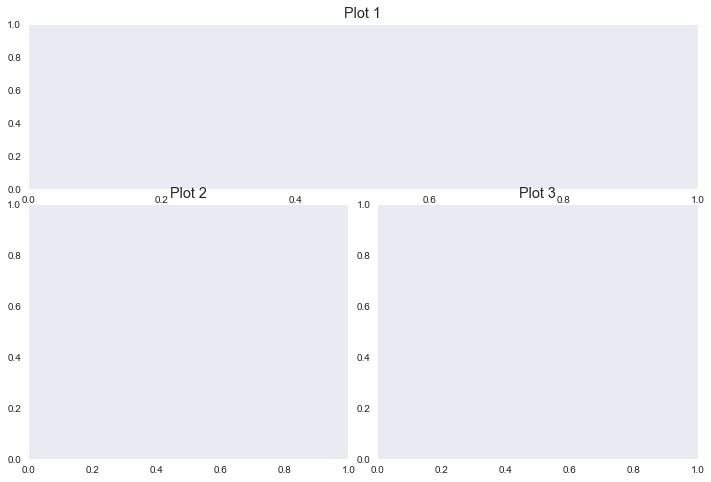

Sample Standard Deviation:  9.69336629245248 


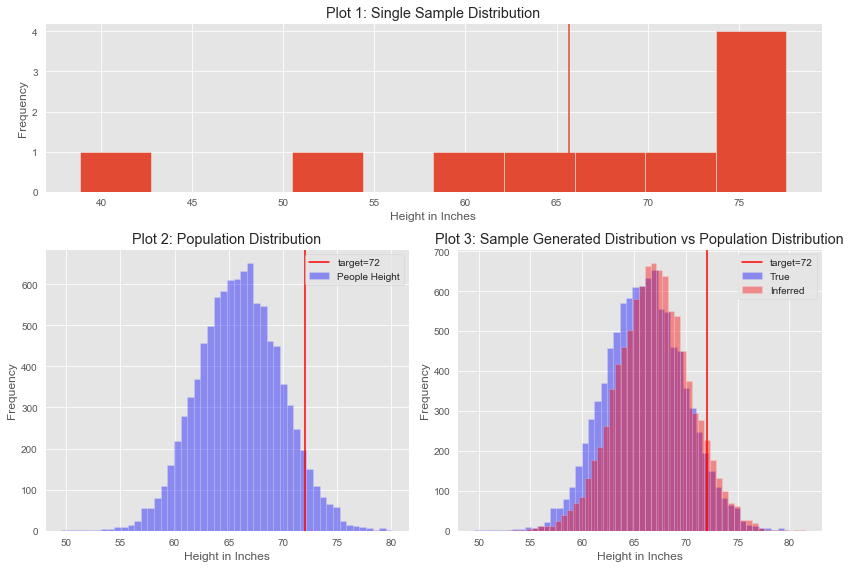

In [165]:
# Multi Plot using Seaborns subplot sns
# f, axes = plt.subplots(1, 2)
# sns.boxplot(  y="b", x= "a", data=df,  orient='v' , ax=axes[0])
# sns.boxplot(  y="c", x= "a", data=df,  orient='v' , ax=axes[1])
fig3 = plt.figure(figsize=(12,8))
gs = fig3.add_gridspec(ncols=4, nrows=5)
ax1 = fig3.add_subplot(gs[0:2, :])
ax1.set_title('Plot 1: Single Sample Distribution')
ax2 = fig3.add_subplot(gs[2:5, 0:2])
ax2.set_title('Plot 2: Population Distribution')
ax3 = fig3.add_subplot(gs[2:5, -2:])
ax3.set_title('Plot 3: Sample Generated Distribution vs Population Distribution')
plt.style.use('ggplot') # ggplot  tableau-colorblind10  seaborn-dark-palette  bmh  default

# Plot 1 - One Sample
# randomly pick one sample and plot it out = single sample histogram analysis

# sample_survey = height_surveys[1][:]
ax1.hist(sample_survey, label='People Height')

# vertical line to show the mean
ax1.axvline(x=sample_survey.mean(), ymin=0, ymax=1, label=('single sample mean=' + str(round(sample_survey.mean(),2))))
ax1.set_xlabel("Height in Inches",fontsize=12)
ax1.set_ylabel("Frequency",fontsize=12)
# randomly picked sample again #2
print('Sample Standard Deviation: ' , np.var(height_surveys[2])**0.5, '')    # = 12.5



# Plot 2
# now look at all samples

# histogram of all samples to show true population mean across all surveys
sns.distplot(np.mean(height_surveys,axis=1), 
             kde=False, label='People Height', color='blue', ax=ax2)
ax2.set_xlabel("Height in Inches",fontsize=12)
ax2.set_ylabel("Frequency",fontsize=12)
ax2.axvline(x=target, color='red', label=('target=' + str(round(target,2))))
ax2.legend()
plt.tight_layout()




# Plot 3
# compare sample mean vs. true mean

# plot histogram to show all means for each survey, for all surveys
sns.distplot(np.mean(height_surveys,axis=1), 
             kde=False, label='True', color='blue', ax=ax3)
ax3.set_xlabel("Height in Inches",fontsize=14)
ax3.set_ylabel("Frequency",fontsize=14)
ax3.axvline(x=target, color='red', label=('target=' + str(round(target,2))))

# Calculate stats using single sample
sample_mean = np.mean(height_surveys[3])
sample_stdev = np.var(height_surveys[3])**0.5

# Calculate standard error = sample std dev / sqrt(N) where N = 10 in this example
std_error = sample_stdev/(height_surveys[3].shape[0])**0.5

########IMPORTANT#############################
# Infer distribution using single sample into 10000 samples 
inferred_distribution = [sample_mean + np.random.normal()*\
                        std_error for i in range(10000)]

# Plot histogram of inferred distribution 
sns.distplot(inferred_distribution, kde=False, label='Inferred', color='red', ax=ax3)
ax3.set_xlabel("Height in Inches",fontsize=12)
ax3.set_ylabel("Frequency",fontsize=12)
ax3.legend()
plt.tight_layout()

# If jupyter output starts to scroll, how to remove/undo/turn off the scroll output cell:
# I just placed my cursor in the grey box next to the output and clicked and then all of the output was displayed.

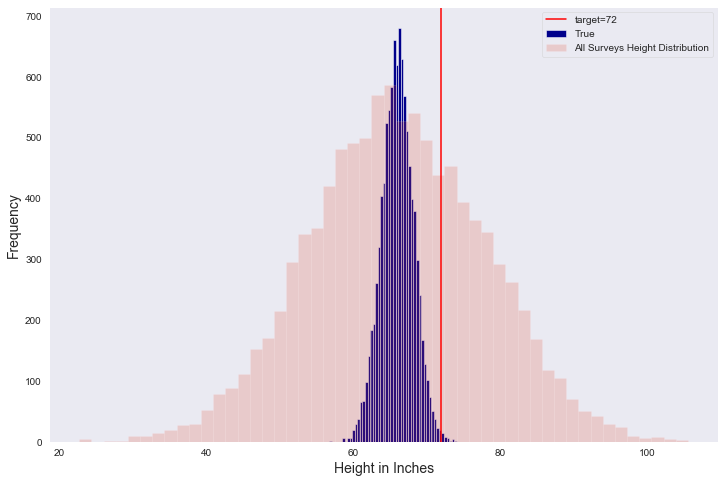

In [184]:
# true vs all surveys combined
fig, ax = plt.subplots(figsize=(12,8))

# True Population
sns.distplot(np.mean(height_surveys,axis=1), kde=False, 
             label='True', color='darkblue', hist_kws = {"alpha": 1.0}, ax=ax)

ax.axvline(x=target, color='red', label=('target=' + str(round(target,2))))

# If you unwrap all surveys, can make distribution wider than True
sns.distplot(height_surveys.flatten()[:height_surveys.shape[0]], 
             kde=False, 
             label='All Surveys Height Distribution', hist_kws = {"alpha": 0.2}, ax=ax)

ax.set_xlabel("Height in Inches",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
plt.legend()

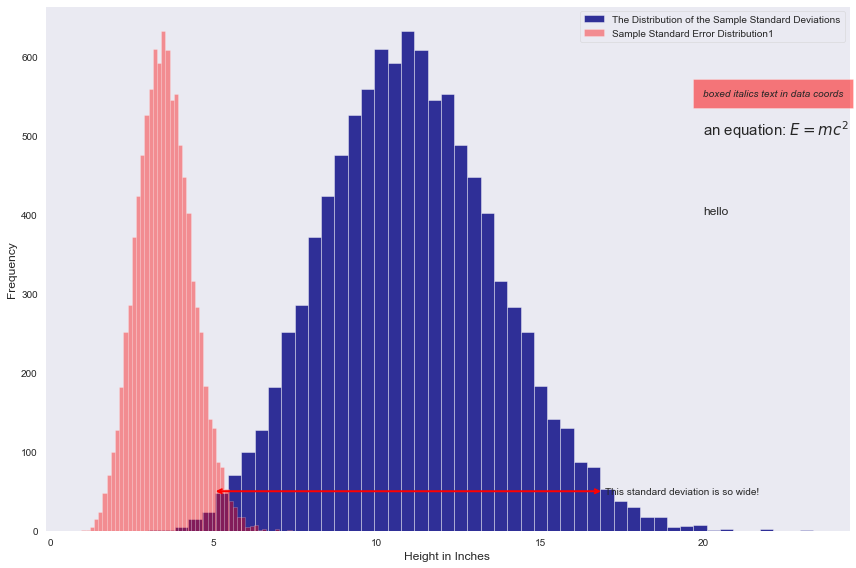

In [170]:
# Variance Analysis (x axis should be smaller now)

# The distribution of the sample standard deviations is also roughly normal (Plot it to prove it)
# Remember that a sample standard deviation is the standard deviation of a single survey of 10 people)

# Take each sample, calculate the standard deviation of each sample, plot it
# Then analyze the "Standard Deviation of Standard Deviations"
# How much does the standard deviation vary?


# Calculate the standard deviation for each sample (square root of the variance)
# np.var:
#         axis = None is default: The default is to compute the variance of the flattened array.
#         axis = 1 calculates each row (axis = 0: calculates down each of the columns)
volatility_dist = (  np.var(height_surveys,axis=1)  )**0.5

# Histogram to show distribution of 10000 sample standard deviation
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('dark')
sns.distplot(volatility_dist, kde=False, label='The Distribution of the Sample Standard Deviations', color='navy',hist_kws = {"alpha": 0.8})
ax.set_xlabel("Inches",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)
ax.legend()


###################################################################################################

# Add more analysis
# How does standard deviation distribution magnitude compare to previous plot (sample distribution of heights)?

# standard error = standard deviation / sqrt(N)
SE_dist = volatility_dist/(height_surveys.shape[1]**0.5)
sns.distplot(SE_dist, kde=False, label='Sample Standard Error Distribution1', color='red', ax=ax)

ax.set_xlabel("Height in Inches",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)
ax.legend()
plt.tight_layout()



###################################################################################################


# Annotate with text + Arrow
# Label and coordinate
ax.annotate('This standard deviation is so wide!', 
             xy=(5, 50), xytext=(17, 50),
             arrowprops={'arrowstyle': '<->','lw': 2, 'color': 'red'}, va='center') # Custom arrow

# regular text
ax.text(20,400, 'hello', fontsize=12)

# boxed text
ax.text(20, 550, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# equation text
ax.text(20, 500, r'an equation: $E=mc^2$', fontsize=15)

plt.tight_layout()




Mean Height:  5.5  feet
Standard Deviation of Height:  1.0  feet


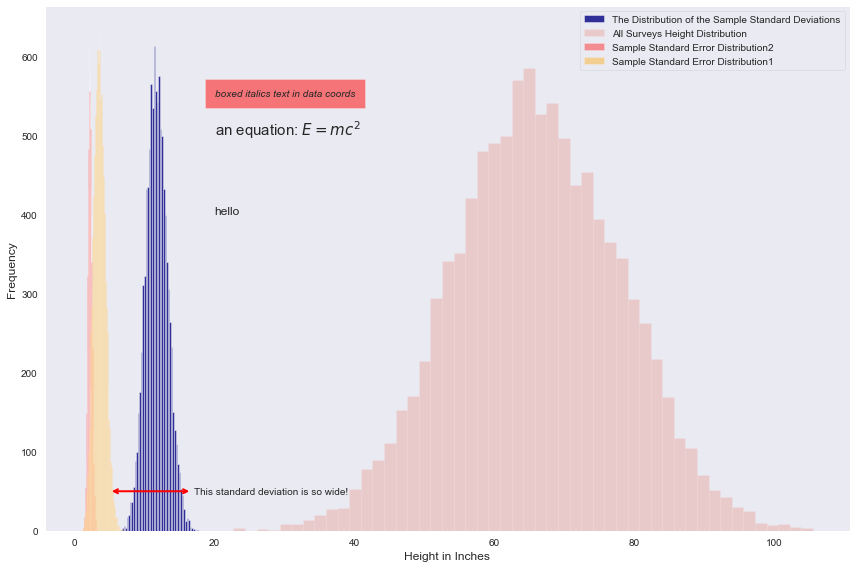

In [176]:
# Increasing N observations to shrink the standard error

random_variable = mean_height + np.random.normal()*stdev_height
# populate the array 
height_surveys = np.zeros((10000,30))
for i in range(height_surveys.shape[0]):
    for j in range(height_surveys.shape[1]):
        height_surveys[i,j] = mean_height + np.random.normal()*stdev_height

print('Mean Height: ', round(np.mean(height_surveys)/12,1), ' feet')
print('Standard Deviation of Height: ', round(np.var(height_surveys)**0.5 / 12, 1), ' feet')

# Variance Analysis (x axis should be smaller now)

# The distribution of the sample standard deviations is also roughly normal (Plot it to prove it)
# Remember that a sample standard deviation is the standard deviation of a single survey of 10 people)

# Take each sample, calculate the standard deviation of each sample, plot it
# Then analyze the "Standard Deviation of Standard Deviations"
# How much does the standard deviation vary?


# Calculate the standard deviation for each sample (square root of the variance)
# np.var:
#         axis = None is default: The default is to compute the variance of the flattened array.
#         axis = 1 calculates each row (axis = 0: calculates down each of the columns)
volatility_dist = (  np.var(height_surveys,axis=1)  )**0.5

# Histogram to show distribution of 10000 sample standard deviation
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('dark')
sns.distplot(volatility_dist, kde=False, label='The Distribution of the Sample Standard Deviations', 
             color='navy',hist_kws = {"alpha": 0.8})
ax.set_xlabel("Inches",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)
ax.legend()




###################################################################################################

# Add more analysis
# How does standard deviation distribution magnitude compare to previous plot (sample distribution of heights)?

# standard error = standard deviation / sqrt(N)
SE_dist2 = volatility_dist/(height_surveys.shape[1]**0.5)
sns.distplot(SE_dist2 , kde=False, label='Sample Standard Error Distribution2', color='red', ax=ax)
sns.distplot(SE_dist , kde=False, label='Sample Standard Error Distribution1', color='orange', ax=ax)

ax.set_xlabel("Height in Inches",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)
ax.legend()
plt.tight_layout()



###################################################################################################


# Annotate with text + Arrow
# Label and coordinate
ax.annotate('This standard deviation is so wide!', 
             xy=(5, 50), xytext=(17, 50),
             arrowprops={'arrowstyle': '<->','lw': 2, 'color': 'red'}, va='center') # Custom arrow

# regular text
ax.text(20,400, 'hello', fontsize=12)

# boxed text
ax.text(20, 550, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# equation text
ax.text(20, 500, r'an equation: $E=mc^2$', fontsize=15)

plt.tight_layout()





In [109]:
# Calculate the probability of a person being 6 feet or taller


# Method 1: using simulation generating 10000 random variables
inferred_dist = [sample_mean + np.random.normal()*std_error for i in range(10000)]
probability1 = sum([1 for i in inferred_dist if i>=target])/len(inferred_dist)
print('The simulated probability is ', probability1)

# Method 2: using cumulative distribution function 
probability2 = 1 - norm.cdf(target, loc=sample_mean, scale=std_error)
print('The calculated probability is ', round(probability2,5))

The simulated probability is  0.0714
The calculated probability is  0.07386


Sample descriptive statistics:
                  0
count  10000.000000
mean       0.065080
std        5.008509
min      -21.574350
25%       -3.342049
50%        0.033659
75%        3.421885
max       19.326905


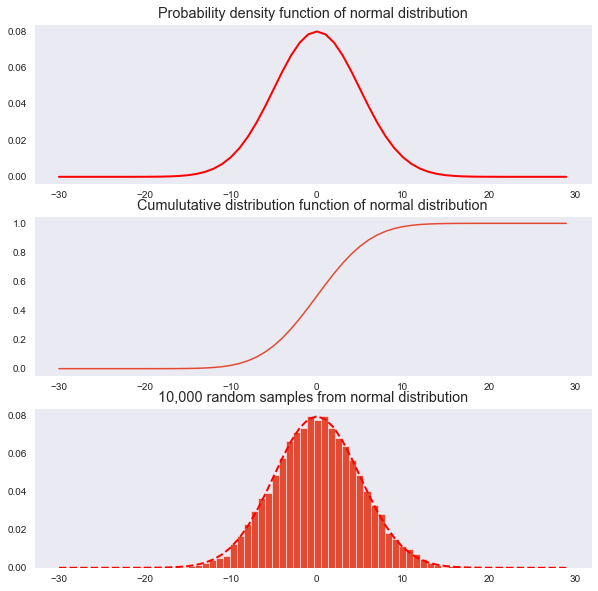

In [173]:
'''
Plot a normally distributed random variable - and samples of this process - using scipy's univariate probability distributions.
'''

from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 0
sigma = 5
rng = range(-30,30)

# Generate normal distribution with given mean and standard deviation.
dist = norm(mu, sigma)

# Plot probability density function and of this distribution.
# the pdf() method takes takes in a list x values and returns a list of y's.
plt.figure(figsize=(10, 10))
plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
plt.title('Probability density function of normal distribution')


# Plot probability density function and of this distribution.
plt.subplot(312)
plt.plot(rng, dist.cdf(rng))
plt.title('Cumulutative distribution function of normal distribution')

# Draw 1000 samples from the random variable.
sample = dist.rvs(size=10000)

print ("Sample descriptive statistics:")
print (pd.DataFrame(sample).describe())

# Plot a histogram of the samples.
plt.subplot(313)
plt.hist(sample, bins=50, density=True)
plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
plt.title('10,000 random samples from normal distribution')


# Show all plots.
plt.show()

In [174]:
print('x')

x
